In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"
list.files(mydir)

[1] "Cuomo_cluster_cell_fractions_by_donor_experiment.csv"    
 [2] "Cuomo_metadata.csv"                                      
 [3] "Cuomo_umap.csv"                                          
 [4] "Cuomo2020.cluster_expression_markers.cluster0.tsv"       
 [5] "Cuomo2020.cluster_expression_markers.cluster1.tsv"       
 [6] "Cuomo2020.cluster_expression_markers.cluster2.tsv"       
 [7] "Cuomo2020.cluster_expression_markers.cluster3.tsv"       
 [8] "Cuomo2020.cluster_expression_markers.cluster4.tsv"       
 [9] "Cuomo2020.cluster_expression_markers.tsv"                
[10] "Sarkar_cluster_cell_fractions_by_donor_experiment.csv"   
[11] "Sarkar_v1_cluster_cell_fractions_by_donor_experiment.csv"
[12] "Sarkar2019_v1.cluster_expression_markers.cluster0.tsv"   
[13] "Sarkar2019_v1.cluster_expression_markers.cluster1.tsv"   
[14] "Sarkar2019_v1.cluster_expression_markers.cluster2.tsv"   
[15] "Sarkar2019_v1.cluster_expression_markers.cluster3.tsv"   
[16] "Sarkar2019_v1.cluster_expression_markers.cluster4.tsv"   
[17] "Sarkar2019_v1.cluster_expression_markers.tsv"            
[18] "Sarkar2019.cluster_expression_markers.cluster0.tsv"      
[19] "Sarkar2019.cluster_expression_markers.cluster1.tsv"      
[20] "Sarkar2019.cluster_expression_markers.cluster2.tsv"      
[21] "Sarkar2019.cluster_expression_markers.cluster3.tsv"      
[22] "Sarkar2019.cluster_expression_markers.tsv"

In [3]:
umap_filename = paste0(mydir, "Cuomo_umap.csv")
umap = read.csv(umap_filename)
head(umap)

index,X_umap1,X_umap2
24351_3#57,3.1864561,-5.9656582
25475_7#40,5.2239864,-2.9730910
24475_1#194,1.8440113,-0.8763768
24353_6#102,-0.2926362,-4.2346405
24475_8#330,2.4096893,3.3578341
24475_3#308,1.3869629,-8.4346656


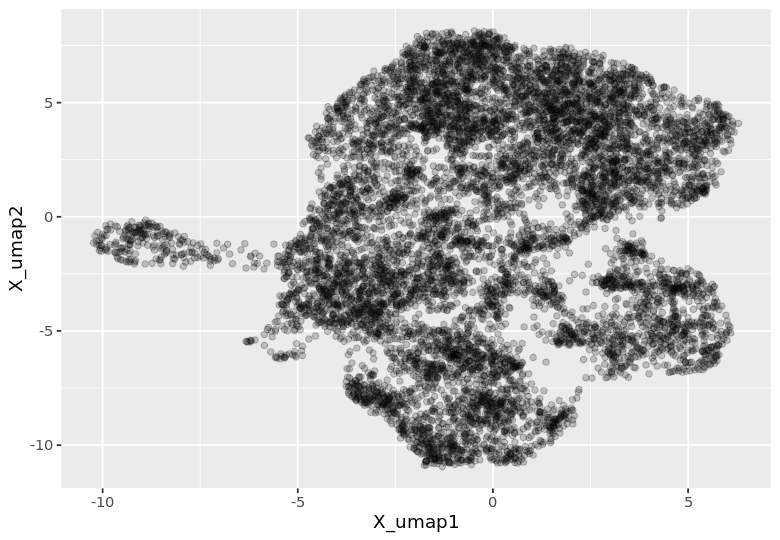

In [4]:
options(repr.plot.width = 6.5, repr.plot.height = 4.5)
ggplot(umap, aes(x = X_umap1, y = X_umap2)) + geom_point(alpha = 0.2)

In [5]:
clusters_filename = paste0(mydir, 'Cuomo2020.cluster_expression_markers.tsv')
clusters = read.csv(clusters_filename, sep = "\t")
head(clusters)

names,pvals,pvals_adj,logfoldchanges,scores,cluster_id,ensembl_gene_id,hgnc_symbol
ENSG00000171724_VAT1L,0,0,2.5292649,45.27934,0,ENSG00000171724,VAT1L
ENSG00000165349_SLC7A3,0,0,1.8714142,45.18132,0,ENSG00000165349,SLC7A3
ENSG00000189067_LITAF,0,0,2.1512449,41.00954,0,ENSG00000189067,LITAF
ENSG00000154277_UCHL1,0,0,0.8063446,40.15680,0,ENSG00000154277,UCHL1
ENSG00000155380_SLC16A1,0,0,0.9335274,40.08745,0,ENSG00000155380,SLC16A1
ENSG00000155760_FZD7,0,0,1.8092395,39.73272,0,ENSG00000155760,FZD7


In [6]:
df = data.frame()
for (cluster in unique(clusters$cluster_id)){
    cluster_df = clusters[clusters$cluster_id == cluster,]
    n = nrow(cluster_df[abs(cluster_df$logfoldchanges) > 2 & clusters$pvals_adj < 0.01,])
    df = rbind(df, data.frame(cluster = cluster, n = n))
}

In [7]:
df

cluster,n
0,188
1,46
2,765
3,147
4,5884


In [8]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable4_genes_associated_w_differentiation_efficiency_fdr0.05.csv")
df_bulk = read.csv(filename)
nrow(df_bulk)
head(df_bulk,2)

[1] 2045

ensembl_gene_id,hgnc_symbol,coef,pval,pval_adj
ENSG00000197461,PDGFA,-0.5542108,1.376734e-14,1.855149e-10
ENSG00000152977,ZIC1,-0.5391174,9.515179e-14,6.410852e-10


In [9]:
filename = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/expression_associations.f_cells.tsv'
df_bulk = read.csv(filename, sep = "\t")
nrow(df_bulk)
head(df_bulk,2)

[1] 13475

ensembl_gene_id,hgnc_symbol,coef,pval,pval_adj
ENSG00000197461,PDGFA,-0.5542108,1.376734e-14,1.855149e-10
ENSG00000152977,ZIC1,-0.5391174,9.515179e-14,6.410852e-10


In [10]:
df = data.frame()
for (cluster in unique(clusters$cluster_id)){
    cluster_df = clusters[clusters$cluster_id == cluster,]
    df_joint = inner_join(cluster_df, df_bulk, by = "ensembl_gene_id")
    r = cor(df_joint$coef, df_joint$logfoldchanges)
    df = rbind(df, data.frame(cluster_id = cluster, r = r, r2 = r**2))
}

Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”

In [11]:
df

cluster_id,r,r2
0,0.38560232,0.1486891504
1,0.03535601,0.0012500473
2,-0.58262979,0.3394574732
3,0.08101838,0.0065639780
4,0.01811879,0.0003282906


In [12]:
meta_filename = paste0(mydir, 'Cuomo_metadata.csv')
meta = read.csv(meta_filename)
nrow(meta)
head(meta,2)

[1] 9661

index,day,donor,experiment,log10_total_counts,log10_total_counts_MT,log10_total_features,n_total_reads,pct_counts_MT,pct_counts_top_100_features,size_factor,donor_long_id,donor_short_id,pseudo,PC1_top500hvgs,cluster_id
24351_3#57,day0,veku,expt_31,5.776207,4.816203,3.984392,41329,10.964525,47.50561,0.7902900,HPSI0713i-veku_2,veku_2,0.16802827,-24.90443,3
25475_7#40,day0,aoxv,expt_43,5.708251,4.675937,4.004149,16119,9.282766,36.49064,0.7891254,HPSI0115i-aoxv_3,aoxv_3,0.09770094,-33.12948,3


In [13]:
df1 = inner_join(umap, meta[,c('index','cluster_id')])
df_to_plot = left_join(df1, df)
nrow(df_to_plot)
head(df_to_plot,2)

Joining, by = "index"
Joining, by = "cluster_id"


[1] 9661

index,X_umap1,X_umap2,cluster_id,r,r2
24351_3#57,3.186456,-5.965658,3,0.08101838,0.006563978
25475_7#40,5.223986,-2.973091,3,0.08101838,0.006563978


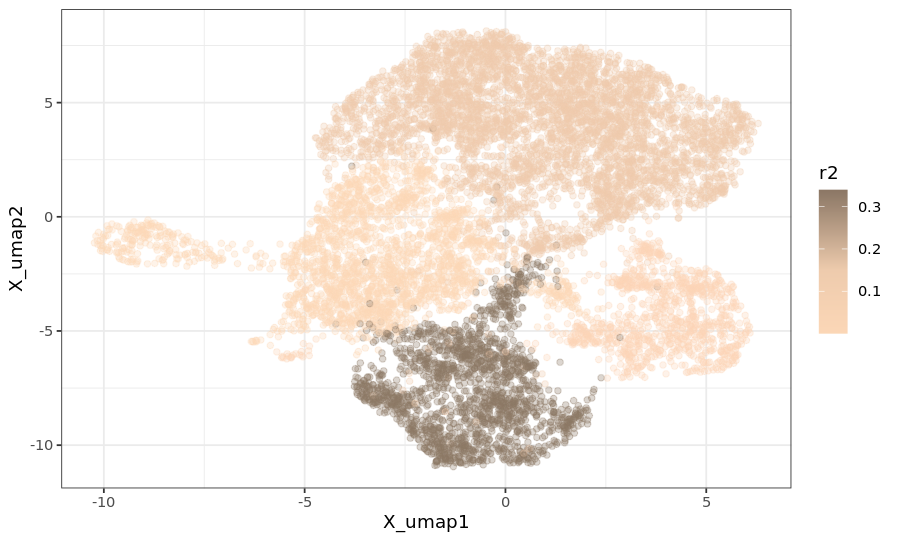

In [20]:
options(repr.plot.width = 7.5, repr.plot.height = 4.5)
ggplot(df_to_plot, aes(x = X_umap1, y = X_umap2, colour = r2)) + geom_point(alpha = 0.3) + 
        scale_color_gradient2(low = "peachpuff",mid = "peachpuff2",high = "peachpuff4", midpoint = 0.15) + 
        theme_bw()

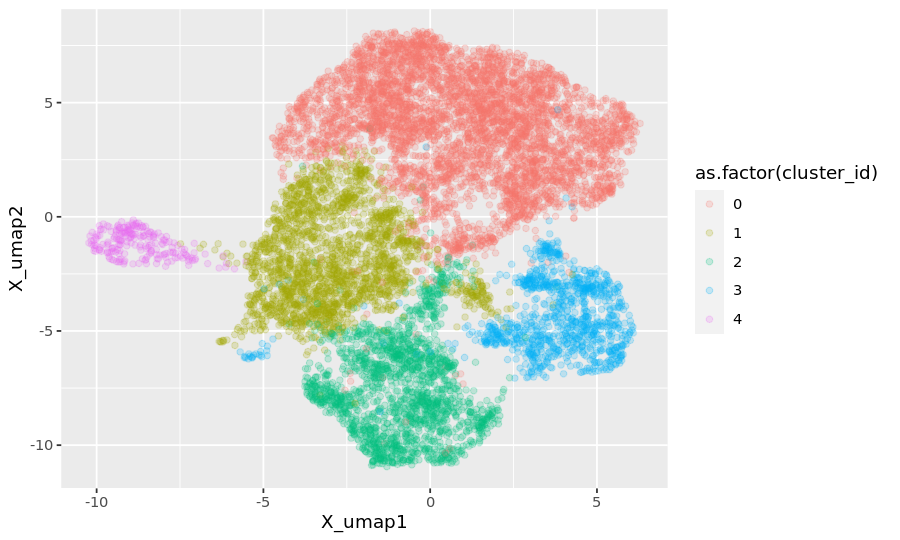

In [38]:
options(repr.plot.width = 7.5, repr.plot.height = 4.5)
ggplot(df_to_plot, aes(x = X_umap1, y = X_umap2, colour = as.factor(cluster_id))) + geom_point(alpha = 0.2)